In [14]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

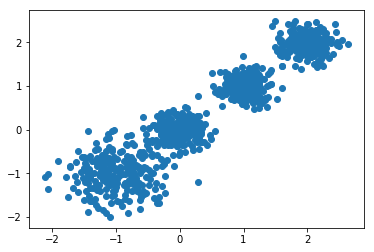

In [6]:
#建立样本集，每个样本2个特征，共4个簇，中心为[-1,-1],[0,0],[1,1],[2,2]，
# 方差为[0.4,0.2,0.2,0.2]
X,y = make_blobs(n_samples=1000,n_features=2,centers = [[-1,-1],[0,0],[1,1],[2,2]],
                 cluster_std=[0.4,0.2,0.2,0.2],random_state=9)
plt.scatter(X[:,0],X[:,1],marker='o')

In [8]:
#训练K-Means模型对样本进行聚类
clu_km = KMeans(n_clusters=2)
clu_km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
y_pred = clu_km.predict(X)

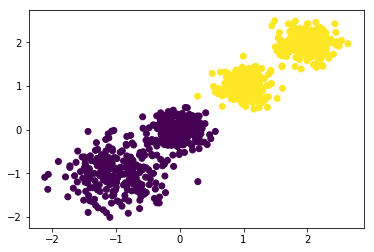

In [12]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y_pred)

In [15]:
#用Calinski-Harabasz Index评估的聚类分数，分数越低效果越好
metrics.calinski_harabaz_score(X,y_pred)

3116.1706763322227

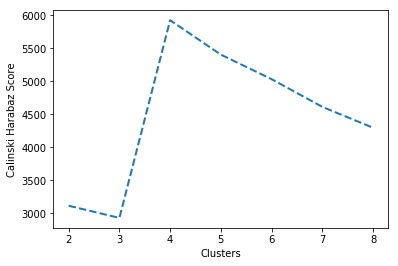

In [27]:
#分别计算各个n_clusters对应的Calinski Harabaz Score
k = [ i + 2 for i in range(7)]
y = []

for i in k:
    y_pred = KMeans(n_clusters=i).fit_predict(X)
    score = metrics.calinski_harabaz_score(X,y_pred)
    y.append(score)
plt.xlabel('Clusters')
plt.ylabel('Calinski Harabaz Score')
plt.plot(k,y,linestyle = '--',lw = 2)

由上图可以看出分将数据集为3个簇的效果最佳